# Comparazione di crittosistemi Conica di Pell

## Implementazione in C e implementazione Python a confronto

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [63]:
c_conic = pd.read_csv('../results/conic_benchmark_512_7680_100.csv')
c_proj  = pd.read_csv('../results/proj_benchmark_512_7680_100.csv' )
c_piso  = pd.read_csv('../results/piso_benchmark_512_7680_100.csv' )
c_bench = pd.concat([c_conic, c_proj, c_piso], axis=0)


In [64]:
py_bench = pd.read_csv('../results/py_elgamal_benchmarks.csv')

## Tempi medi

### Tempi medi C

In [65]:
def means(df: pd.DataFrame) -> pd.DataFrame:
    
    res = df.groupby(['algorithm', 'size']).mean()
    res.sort_values(by=['size', 'algorithm'], key=lambda x: x.map({'CONIC': 0, 'PROJ': 1, 'PISO': 2}), inplace=True)
    return res

means(c_bench)

gen       enc       dec       tot
algorithm size                                        
CONIC     512   0.002009  0.002775  0.001009  0.005793
          1024  0.008790  0.011278  0.004645  0.024713
          1536  0.026257  0.030372  0.012589  0.069219
          3840  0.278709  0.331367  0.137730  0.747806
          7680  1.324830  2.024047  0.854623  4.203501
PROJ      512   0.001465  0.002059  0.001029  0.004553
          1024  0.006150  0.008441  0.003947  0.018538
          1536  0.015771  0.020385  0.010185  0.046341
          3840  0.153046  0.222696  0.111511  0.487253
          7680  0.884831  1.387816  0.696259  2.968905
PISO      512   0.000851  0.000846  0.000365  0.002063
          1024  0.003924  0.004368  0.001810  0.010101
          1536  0.011379  0.012531  0.005067  0.028977
          3840  0.115127  0.140459  0.056295  0.311881
          7680  0.561704  0.853987  0.347179  1.762871

### Tempi medi Python

In [66]:
means(py_bench)

gen        enc        dec        tot
algorithm size                                            
CONIC     512    0.015009   0.016485   0.006435   0.037929
          1024   0.079707   0.088261   0.035012   0.202980
          1536   0.219009   0.272544   0.109462   0.601015
          3840   2.509112   3.348255   1.344552   7.201919
          7680  15.803941  23.653576  16.690622  56.148139
PROJ      512    9.786255   0.010171   0.005175   9.801601
          1024   9.786255   0.058114   0.029449   9.873819
          1536   9.786255   0.172062   0.085935  10.044252
          3840   9.786255   2.229114   1.117667  13.133037
          7680   9.786255  18.130704   7.385229  35.302189
PISO      512    0.005745   0.007759   0.002738   0.016243
          1024   0.031956   0.043642   0.014681   0.090279
          1536   0.083096   0.129855   0.043377   0.256328
          3840   1.036333   1.604061   0.527327   3.167721
          7680   5.900381  10.839933   3.666660  20.406974

### Confronto istanza completa Python vs C per tutte le size

In [67]:
c_tot = c_bench.drop(columns=['gen', 'enc', 'dec']).groupby(['algorithm', 'size']).mean().reset_index()
py_tot = py_bench.drop(columns=['gen', 'enc', 'dec']).groupby(['algorithm', 'size']).mean().reset_index()
comp = pd.merge(c_tot, py_tot, on=['algorithm', 'size'], how='outer', suffixes=('_c', '_py'))
# custom sort
comp.sort_values(by=['size', 'algorithm'], key=lambda x: x.map({'CONIC': 0, 'PROJ': 1, 'PISO': 2}), inplace=True)
comp

,algorithm,size,tot_c,tot_py
0,CONIC,512,0.005793,0.037929
1,CONIC,1024,0.024713,0.202980
2,CONIC,1536,0.069219,0.601015
3,CONIC,3840,0.747806,7.201919
4,CONIC,7680,4.203501,56.148139
10,PROJ,512,0.004553,9.801601
11,PROJ,1024,0.018538,9.873819
12,PROJ,1536,0.046341,10.044252
13,PROJ,3840,0.487253,13.133037
14,PROJ,7680,2.968905,35.302189


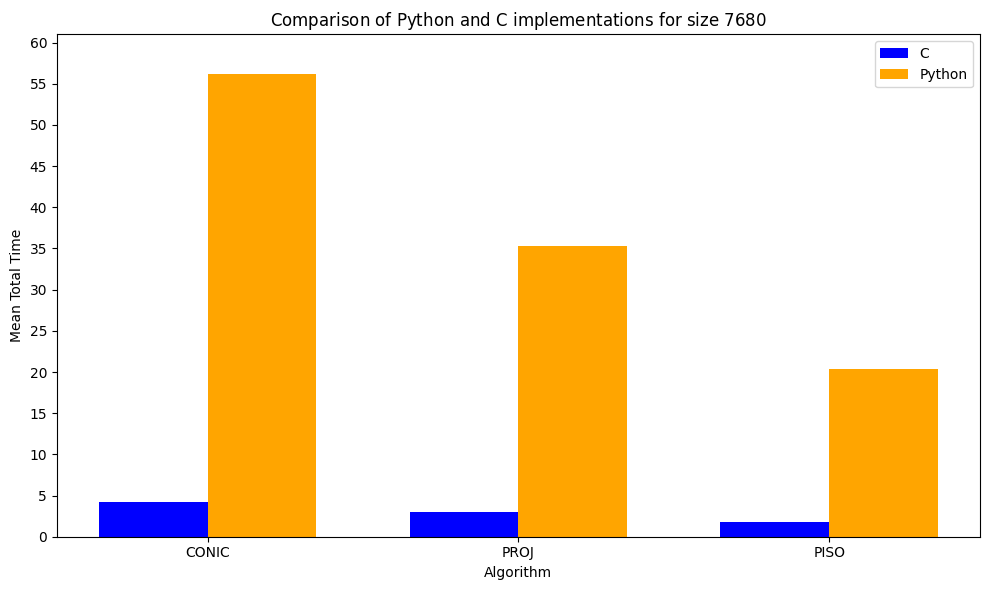

In [68]:
# Filter data for size 7680
size_7680_c = c_bench[c_bench['size'] == 7680]
size_7680_py = py_bench[py_bench['size'] == 7680]

# Algorithms to compare
algorithms = ['CONIC', 'PROJ', 'PISO']

# Prepare data for the grouped bar chart
c_means = [size_7680_c[size_7680_c['algorithm'] == algo]['tot'].mean() for algo in algorithms]
py_means = [size_7680_py[size_7680_py['algorithm'] == algo]['tot'].mean() for algo in algorithms]

x = np.arange(len(algorithms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, c_means, width, label='C', color='blue')
bars2 = ax.bar(x + width/2, py_means, width, label='Python', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Algorithm')
ax.set_ylabel('Mean Total Time')
ax.set_ylim(0, 61.0)
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.set_title('Comparison of Python and C implementations for size $7680$')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [69]:
improvement_percentage = [
    100 * (py - c) / py for c, py in zip(c_means, py_means)
]
for algo, improvement in zip(algorithms, improvement_percentage):
    print(f"Algorithm: {algo}, Improvement:\t{improvement:.2f}%")

Algorithm: CONIC, Improvement:	92.51%
Algorithm: PROJ, Improvement:	91.59%
Algorithm: PISO, Improvement:	91.36%


## Confronto tra diversi algoritmi (implementazione C)

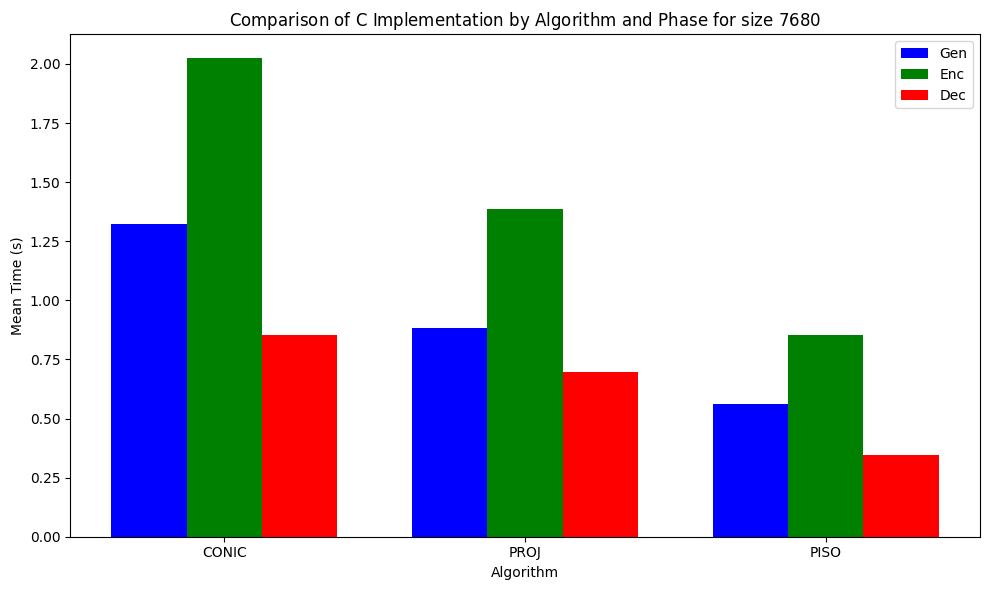

In [70]:
phases = ['gen', 'enc', 'dec']
c_means_phases = {
    phase: [c_bench[(c_bench['algorithm'] == algo) & (c_bench['size'] == 7680)][phase].mean() for algo in algorithms]
    for phase in phases
}

x = np.arange(len(algorithms))  
width = 0.25  

fig, ax = plt.subplots(figsize=(10, 6))

bars_gen = ax.bar(x - width, c_means_phases['gen'], width, label='Gen', color='blue')
bars_enc = ax.bar(x, c_means_phases['enc'], width, label='Enc', color='green')
bars_dec = ax.bar(x + width, c_means_phases['dec'], width, label='Dec', color='red')

# Add labels, title, and legend
ax.set_xlabel('Algorithm')
ax.set_ylabel('Mean Time (s)')
ax.set_title('Comparison of C Implementation by Algorithm and Phase for size $7680$')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

plt.tight_layout()
plt.show()

## Deviazione standard e varianza

In [71]:
c_bench.groupby(['algorithm', 'size']).std()

gen       enc       dec       tot
algorithm size                                        
CONIC     512   0.000978  0.000477  0.000141  0.001236
          1024  0.003901  0.000645  0.000276  0.003981
          1536  0.016467  0.000735  0.000427  0.016578
          3840  0.138959  0.004326  0.003072  0.140130
          7680  0.750548  0.060493  0.017149  0.752547
PISO      512   0.000363  0.000048  0.000035  0.000379
          1024  0.001709  0.000198  0.000092  0.001745
          1536  0.004985  0.000378  0.000191  0.004969
          3840  0.053116  0.003387  0.001820  0.052725
          7680  0.244843  0.038007  0.018174  0.253286
PROJ      512   0.000820  0.001004  0.000530  0.001577
          1024  0.004054  0.004430  0.001134  0.008829
          1536  0.007221  0.001334  0.000508  0.007339
          3840  0.055379  0.002551  0.001944  0.055684
          7680  0.413254  0.041883  0.026954  0.430039

In [72]:
c_bench.groupby(['algorithm', 'size']).var()

gen           enc           dec           tot
algorithm size                                                        
CONIC     512   9.563554e-07  2.279691e-07  1.979284e-08  1.528791e-06
          1024  1.521682e-05  4.164513e-07  7.605024e-08  1.585066e-05
          1536  2.711506e-04  5.399840e-07  1.821510e-07  2.748409e-04
          3840  1.930973e-02  1.871554e-05  9.437474e-06  1.963646e-02
          7680  5.633216e-01  3.659383e-03  2.940868e-04  5.663269e-01
PISO      512   1.315729e-07  2.322573e-09  1.225425e-09  1.437767e-07
          1024  2.921945e-06  3.918361e-08  8.404184e-09  3.044717e-06
          1536  2.485207e-05  1.425674e-07  3.654994e-08  2.469558e-05
          3840  2.821306e-03  1.147013e-05  3.313768e-06  2.779885e-03
          7680  5.994826e-02  1.444511e-03  3.303119e-04  6.415372e-02
PROJ      512   6.721215e-07  1.007227e-06  2.813123e-07  2.486014e-06
          1024  1.643822e-05  1.962175e-05  1.286820e-06  7.795277e-05
          1536  5.214320e-05  1.779252e-06  2.580635e-07  5.386809e-05
          3840  3.066789e-03  6.505657e-06  3.778647e-06  3.100707e-03
          7680  1.707790e-01  1.754183e-03  7.265109e-04  1.849338e-01

In [73]:
def improvement_percentage(old, new):
    return 100 * (old - new) / old

def compare_algorithm(algo: str):
    comp = c_bench[c_bench['algorithm'] == algo].groupby(['algorithm','size']).mean()[['tot']].reset_index()	
    others = c_bench[c_bench['algorithm'] != algo].groupby(['algorithm','size']).mean()[['tot']].reset_index()
    
    comparison = comp.merge(others, on='size', suffixes=('_comp', '_others'))
    comparison['improvement (%)'] = improvement_percentage(comparison['tot_others'], comparison['tot_comp'])

    return comparison

    
compare_algorithm('PISO')

,algorithm_comp,size,tot_comp,algorithm_others,tot_others,improvement (%)
0,PISO,512,0.002063,CONIC,0.005793,64.385910
1,PISO,512,0.002063,PROJ,0.004553,54.684312
2,PISO,1024,0.010101,CONIC,0.024713,59.125927
3,PISO,1024,0.010101,PROJ,0.018538,45.510577
4,PISO,1536,0.028977,CONIC,0.069219,58.136543
5,PISO,1536,0.028977,PROJ,0.046341,37.469382
6,PISO,3840,0.311881,CONIC,0.747806,58.293805
7,PISO,3840,0.311881,PROJ,0.487253,35.991835
8,PISO,7680,1.762871,CONIC,4.203501,58.061840
9,PISO,7680,1.762871,PROJ,2.968905,40.622193


# Confronto tre fasi per algoritmo con isomorfismi

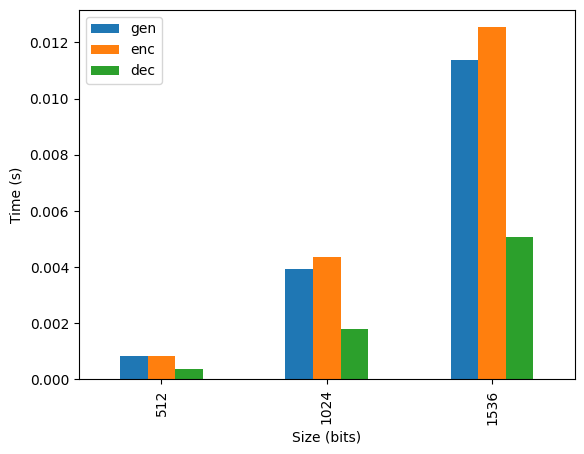

In [74]:
piso = c_piso.drop(['tot', 'algorithm'], axis=1).groupby('size').mean().reset_index()
piso[piso['size'].between(512, 1536)].plot.bar(x='size', xlabel='Size (bits)', ylabel='Time (s)')


plt.show()

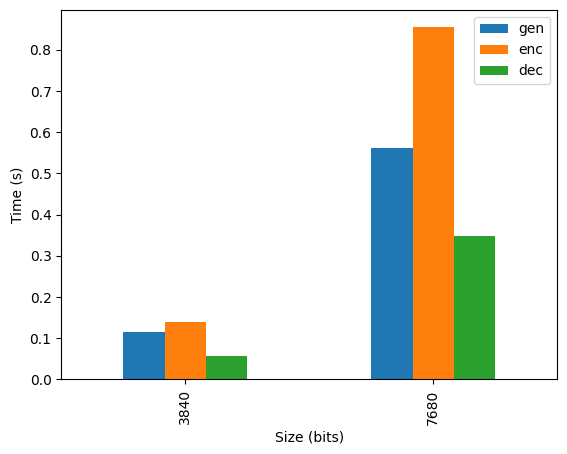

In [75]:
piso[piso['size'].between(3840, 7680)].plot.bar(x='size', xlabel='Size (bits)', ylabel='Time (s)')
plt.show()

## Deviazione standard delle fasi

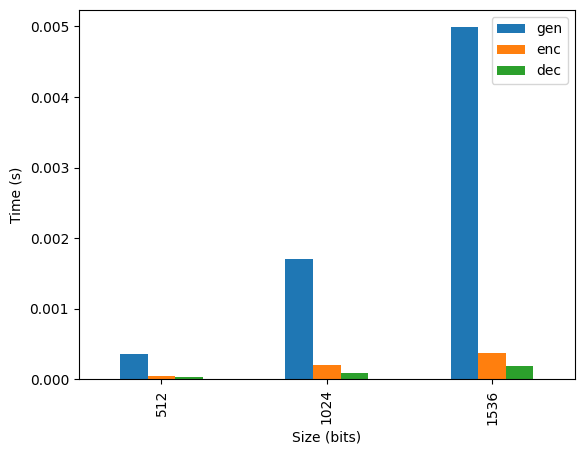

In [76]:
piso_std = c_piso.drop(['tot', 'algorithm'], axis=1).groupby('size').std().reset_index()
piso_std[piso_std['size'].between(512, 1536)].plot.bar(x='size', xlabel='Size (bits)', ylabel='Time (s)')
plt.show()


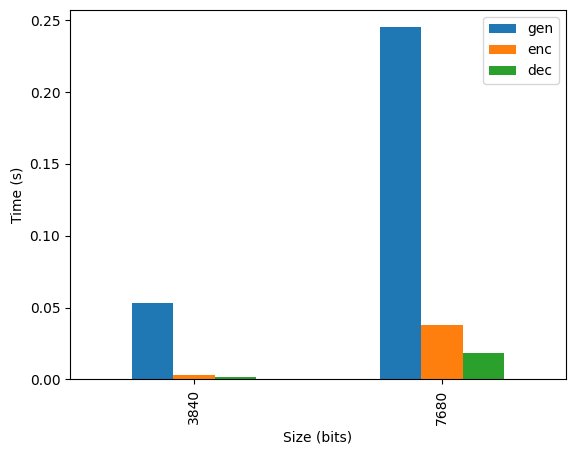

In [77]:
piso_std[piso_std['size'].between(3840, 7680)].plot.bar(x='size', xlabel='Size (bits)', ylabel='Time (s)')
plt.show()